In [198]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sys

Load in Data from CSV

In [199]:
df = pd.read_csv('/home/sabsr3/Rotations/ADCC/ADCC-Project/Data/basic_model_synthetic_data.csv')

Extract Data

In [200]:
# dataframe for mu=20 and 1% noise

df1 = df.loc[(df['mu'] == 20) & (df['noise level'] == 0.01) & (df['t'].isin([0.0, 1.0]))]
print(df1)

       Unnamed: 0    t    mu         gamma  noise level         A         R  \
1760         1760  0.0  20.0  1.000000e+00         0.01  0.993650  0.000000   
1770         1770  1.0  20.0  1.000000e+00         0.01  1.006841  0.000175   
1771         1771  0.0  20.0  1.000000e+00         0.01  0.999741  0.000000   
1781         1781  1.0  20.0  1.000000e+00         0.01  1.006647  0.000176   
1782         1782  0.0  20.0  1.000000e+00         0.01  0.992052  0.000000   
...           ...  ...   ...           ...          ...       ...       ...   
19447       19447  1.0  20.0  1.000000e-08         0.01  0.993880  0.996879   
19448       19448  0.0  20.0  1.000000e-08         0.01  1.001961  0.000000   
19458       19458  1.0  20.0  1.000000e-08         0.01  1.005302  0.995046   
19459       19459  0.0  20.0  1.000000e-08         0.01  0.999704  0.000000   
19469       19469  1.0  20.0  1.000000e-08         0.01  1.008057  1.005955   

              S         C  
1760   1.002976  0.0000

In [201]:
gamma_vals = [1, 1e-1, 1e-2, 1e-3, 1e-4, 1e-5, 1e-6] 
df_kpercent = pd.DataFrame(columns=['gamma', 'kill percentage'])
for gamma in gamma_vals:
    data = df1.loc[df1['gamma'] == gamma]
    S_vals = data['S'].values
    for i in np.arange(0, 19, 2):
        kill_percent = 1 - (S_vals[i + 1]/S_vals[i])
        df_kpercent = df_kpercent.append({'gamma' : gamma,
                                          'kill percentage' : kill_percent}, ignore_index=True)
    
max_vals = []
min_vals = []
mean_vals = []

for gamma in gamma_vals:
    gamma_data = df_kpercent.loc[df_kpercent['gamma'] == gamma]
    percentage_data = gamma_data['kill percentage'].values
    max_vals.append(percentage_data.max())
    min_vals.append(percentage_data.min())
    mean_vals.append(percentage_data.mean())


(0.0, -15.0)

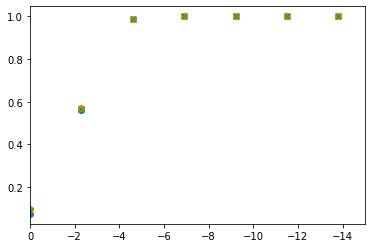

In [202]:
fig, ax = plt.subplots()

ax.scatter(np.log(gamma_vals), min_vals)
ax.scatter(np.log(gamma_vals), max_vals)
ax.scatter(np.log(gamma_vals), mean_vals, marker = 'x')
ax.set_xlim([0, -15])

Call in class to calculate kill percentage data

In [203]:
sys.path.append('/home/sabsr3/Rotations/ADCC/ADCC-Project')
import data_visualisation
from data_visualisation import BasicModelDataVisualisation

In [204]:
mu_vals = [1.25, 2.5, 5, 10, 20]
gamma_vals = [1, 1e-1, 1e-2, 1e-3, 1e-4, 1e-5, 1e-6]
data_tinkerer = BasicModelDataVisualisation(mu_vals, gamma_vals, '/home/sabsr3/Rotations/ADCC/ADCC-Project/Notebooks/basic_model_synthetic_data.csv')

In [205]:
max_data, min_data, mean_data = data_tinkerer.calculate_kill_percentage(0.01)

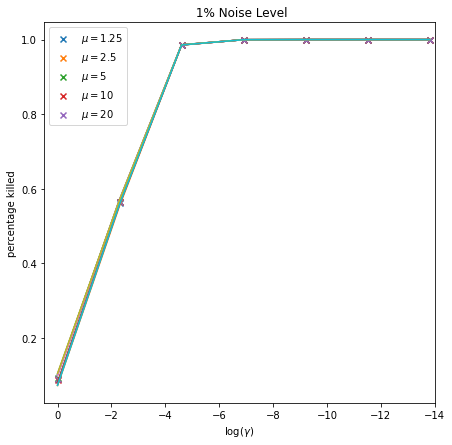

In [207]:
fig, ax = plt.subplots(figsize=(7, 7))

for i in range(len(mu_vals)):
    ax.plot(np.log(gamma_vals), max_data[i])
    ax.plot(np.log(gamma_vals), min_data[i])
    ax.scatter(np.log(gamma_vals), mean_data[i], label = '$\mu =$' + str(mu_vals[i]), marker = 'x')
    ax.set_xlabel('log($\gamma$)')
    ax.set_ylabel('percentage killed')
    ax.set_xlim([0.5, -14])
    ax.set_title(' 1% Noise Level')
    ax.legend()
    

plt.show()

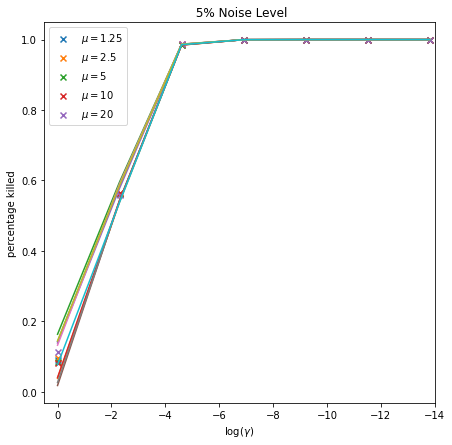

In [208]:
max_data, min_data, mean_data = data_tinkerer.calculate_kill_percentage(0.05)
fig, ax = plt.subplots(figsize=(7, 7))

for i in range(len(mu_vals)):
    ax.plot(np.log(gamma_vals), max_data[i])
    ax.plot(np.log(gamma_vals), min_data[i])
    ax.scatter(np.log(gamma_vals), mean_data[i], label = '$\mu =$' + str(mu_vals[i]), marker = 'x')
    ax.set_xlabel('log($\gamma$)')
    ax.set_ylabel('percentage killed')
    ax.set_xlim([0.5, -14])
    ax.set_title(' 5% Noise Level')
    ax.legend()
    

plt.show()

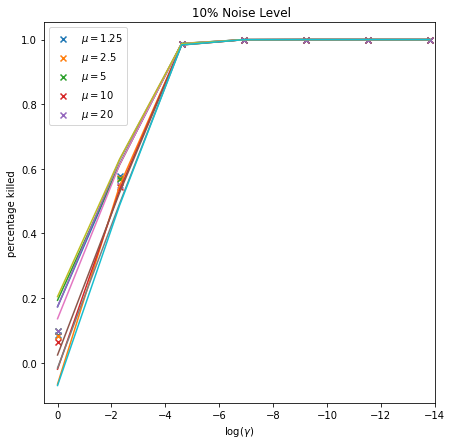

In [209]:
max_data, min_data, mean_data = data_tinkerer.calculate_kill_percentage(0.1)

fig, ax = plt.subplots(figsize=(7, 7))

for i in range(len(mu_vals)):
    ax.plot(np.log(gamma_vals), max_data[i])
    ax.plot(np.log(gamma_vals), min_data[i])
    ax.scatter(np.log(gamma_vals), mean_data[i], label = '$\mu =$' + str(mu_vals[i]), marker = 'x')
    ax.set_xlabel('log($\gamma$)')
    ax.set_ylabel('percentage killed')
    ax.set_xlim([0.5, -14])
    ax.set_title(' 10% Noise Level')
    ax.legend()
    

plt.show()

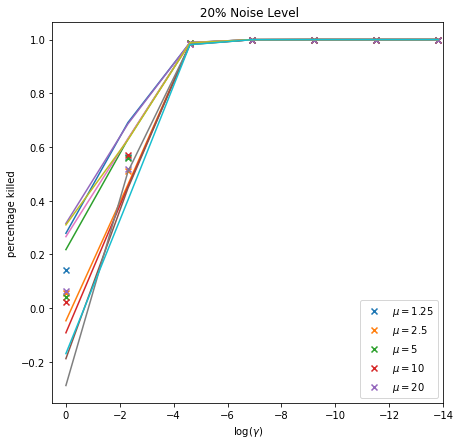

In [210]:
max_data, min_data, mean_data = data_tinkerer.calculate_kill_percentage(0.2)

fig, ax = plt.subplots(figsize=(7, 7))

for i in range(len(mu_vals)):
    ax.plot(np.log(gamma_vals), max_data[i])
    ax.plot(np.log(gamma_vals), min_data[i])
    ax.scatter(np.log(gamma_vals), mean_data[i], label = '$\mu =$' + str(mu_vals[i]), marker = 'x')
    ax.set_xlabel('log($\gamma$)')
    ax.set_ylabel('percentage killed')
    ax.set_title(' 20% Noise Level')
    ax.set_xlim([0.5, -14])
    ax.legend()
    

plt.show()